## Problem 5.1

In [11]:
%matplotlib inline
from __future__ import division
pylab.rcParams['figure.figsize'] = (16, 10)
import scipy.io as sio
import numpy as np
import math
import matplotlib.pyplot as plt
data = sio.loadmat('../data/programming/hw1progde.mat')
test_data = data['x_te']
training_data = data['x_tr']
h = 0.01

## 10 different measures, whcih one isbest? training or validation

In [9]:
def K(x, XI, h, kernel_type='gaussian'):
    """
    Parameters
    ----------
    x: Point location
    XI: Vector of training data
    """
    if kernel_type == 'gaussian':
        s=0
        l=0
        for xi in XI:
            u = (x-xi)/h
            l+=1
            e = (1/math.sqrt(2*math.pi))*math.exp(-u*u/2)
            s+=e
        return s/(l*h)
    elif kernel_type == 'epanechnikov':
        s=0
        l=0
        for xi in XI:
            u = (x-xi)/h
            l+=1
            if abs(u)<=1:
                s+=(3/4)*(1-u*u)
        return s/(l*h)
    elif kernel_type == 'histogram':
        s=0
        l=0
        for xi in XI:
            u = (x-xi)/h
            l+=1
            if abs(u)<=1:
                s+=0.5
        return s/(l*h)

def inrange(x,Y):
    if x<Y[1] and X>=Y[0]:
        return True 
    return False

def histogram(x, bandwidth=1):
    min_x = np.min(x)
    max_x = np.max(x)
    range_x = max_x-min_x
    bins = math.ceil(range_x/bandwidth)
    list_of_bins = []
    for i in range(bins):
        list_of_bins.append([min_x+bandwidth*i, min_x+bandwidth*(i+1)])
    counts = np.zeros(bins)
    for xi in x:
        for lindex, lb in enumerate(list_of_bins):
            if inrange(xi, lb):
                counts[lindex]+=1
    return counts   

## Gaussian
$$
K(u) = \frac{1}{\sqrt{2\pi}} e^{-\frac{u^2}{2}} \forall u \in \mathbb{R}
$$

$$
h = (\frac{4\sigma^5}{3n})^{\frac{1}{5}} \approx 0.94\sigma n^{-\frac{1}{5}}
$$

In [38]:
## Optimum bandwidth calculation
sigma_tr = np.std(training_data)
sigma_te = np.std(test_data)

h = 0.94*sigma_tr*len(training_data)**(-0.2)

print(sigma_tr)
print(sigma_te)
print(h)


0.262856444965
0.258378205441
0.0712939180627


In [21]:
H = [0.01,0.07,0.05,0.1,0.5, 0.7]
output_gaussian = []
x_points = np.linspace(0.1,1)

for h in H:
    gaussian_r = [K(x,training_data, h, 'gaussian') for x in x_points]
    output_gaussian.append(gaussian_r)



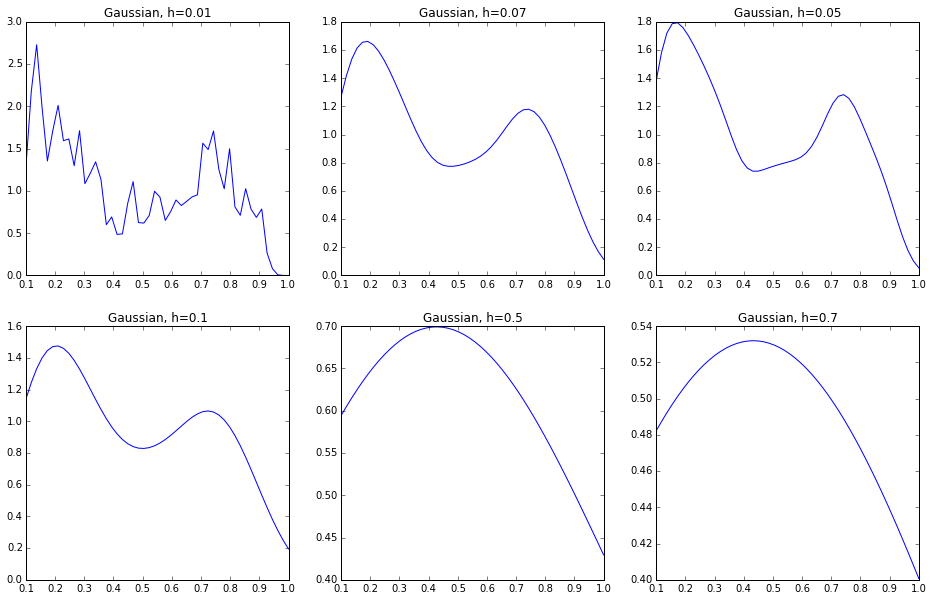

In [24]:
f, axarr = plt.subplots(2, 3)
for i, gaussian_r in enumerate(output_gaussian):
    if i<3:
        axarr[0, i].plot(np.sort(x_points), gaussian_r)
        axarr[0, i].set_title('Gaussian, h={}'.format(H[i]))
    else:
        axarr[1, i-3].plot(np.sort(x_points), gaussian_r)
        axarr[1, i-3].set_title('Gaussian, h={}'.format(H[i]))
f.show()

## Epanechnikov kernel

$$
K(u) = \begin{cases}
\frac{3}{4}[1-u^2] & |u| \in [0,1],\\
0 & otherwise
\end{cases}
$$

In [27]:
ev_r = []
for h in H:
    r = [K(x,training_data, h, 'epanechnikov') for x in x_points]
    ev_r.append(r)


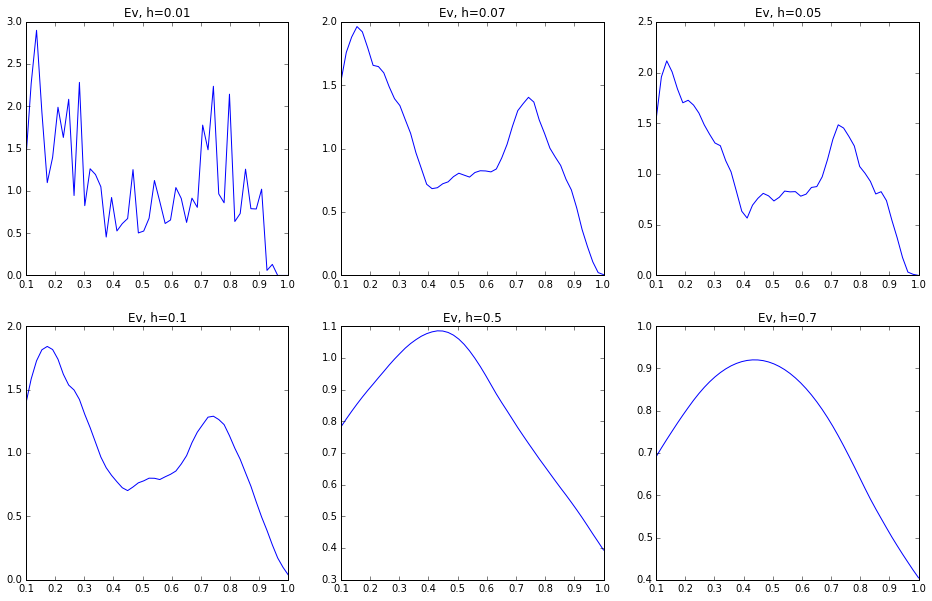

In [28]:
f, axarr = plt.subplots(2, 3)
for i, gaussian_r in enumerate(ev_r):
    if i<3:
        axarr[0, i].plot(np.sort(x_points), gaussian_r)
        axarr[0, i].set_title('Ev, h={}'.format(H[i]))
    else:
        axarr[1, i-3].plot(np.sort(x_points), gaussian_r)
        axarr[1, i-3].set_title('Ev, h={}'.format(H[i]))
f.show()

## Histogram
$$
K(u) = \begin{cases}
\frac{1}{2}  & |u| \leq 1\\
0 & otherwise \\
\end{cases}
$$

In [30]:
hi_r = []
for h in H:
    r = [K(x,training_data, h, 'histogram') for x in x_points]
    hi_r.append(r)


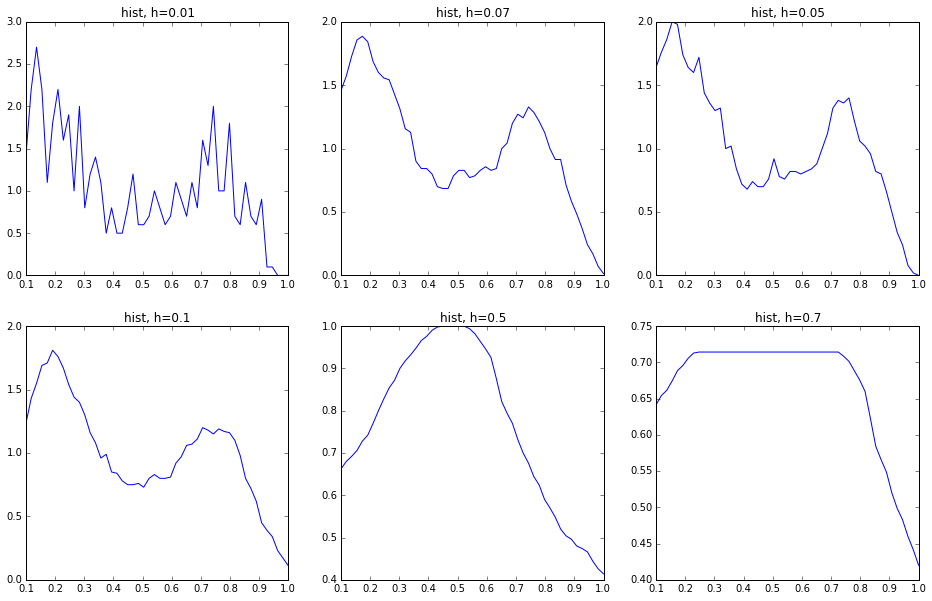

In [31]:
f, axarr = plt.subplots(2, 3)
for i, gaussian_r in enumerate(hi_r):
    if i<3:
        axarr[0, i].plot(np.sort(x_points), gaussian_r)
        axarr[0, i].set_title('hist, h={}'.format(H[i]))
    else:
        axarr[1, i-3].plot(np.sort(x_points), gaussian_r)
        axarr[1, i-3].set_title('hist, h={}'.format(H[i]))
f.show()

In [39]:
## Randomly partion test_Data into 19 subsets
import random
N_split = 19
test_data_shuffled = test_data.copy()
random.shuffle(test_data_shuffled)
list_size = int(len(test_data_shuffled)/N_split)
list_of_shuffled_te = [test_data_shuffled[0+list_size*i : list_size*(i+1)] for i in xrange(N_split)]

x_points = np.linspace(0.1,1)
def calc_variance(x_points, list_of_shuffled_te,h,kernel):
    f_scores=[]
    for index, lte in enumerate(list_of_shuffled_te):
        f_scores.append([])
        for x in x_points:
            de = K(x, lte, h, kernel)
            f_scores[index].append(de)

    f_hn = np.array([np.sum(a) for a in f_scores])
    f_h = np.mean(f_hn)
    q = np.sum((f_hn-f_h)**2)
    E=q/N_split
    return E
kernel = 'gaussian'
g_h = []
e_h = []
h_h = []
for h in H:
    g_h.append(calc_variance(x_points, list_of_shuffled_te,h,kernel))
print g_h
kernel = 'epanechnikov'
for h in H:
    e_h.append(calc_variance(x_points, list_of_shuffled_te,h,kernel))
    
kernel = 'histogram'
for h in H:
    h_h.append(calc_variance(x_points, list_of_shuffled_te,h,kernel))
    

500
50
[0.22748279515456216, 0.20553587088211445, 0.19093908377970156, 0.22953779645161712, 0.030682649145808503, 0.0068603916142102898]


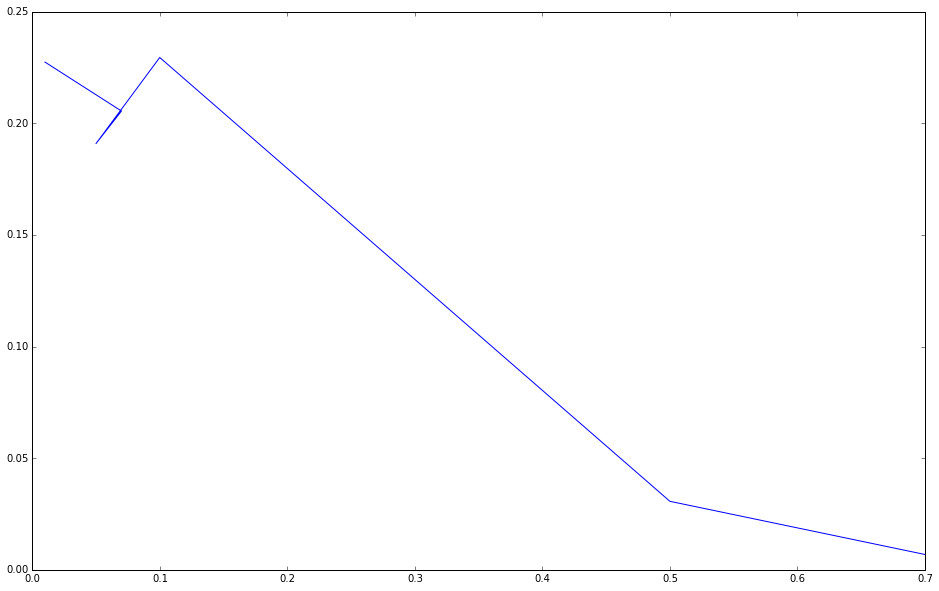

In [40]:
plt.plot(H,g_h)

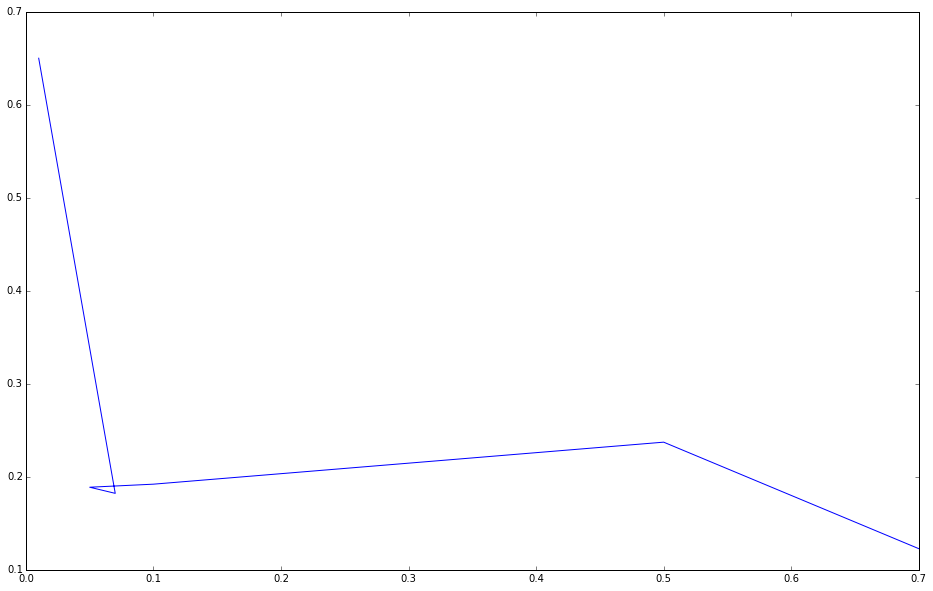

In [41]:
plt.plot(H,e_h)

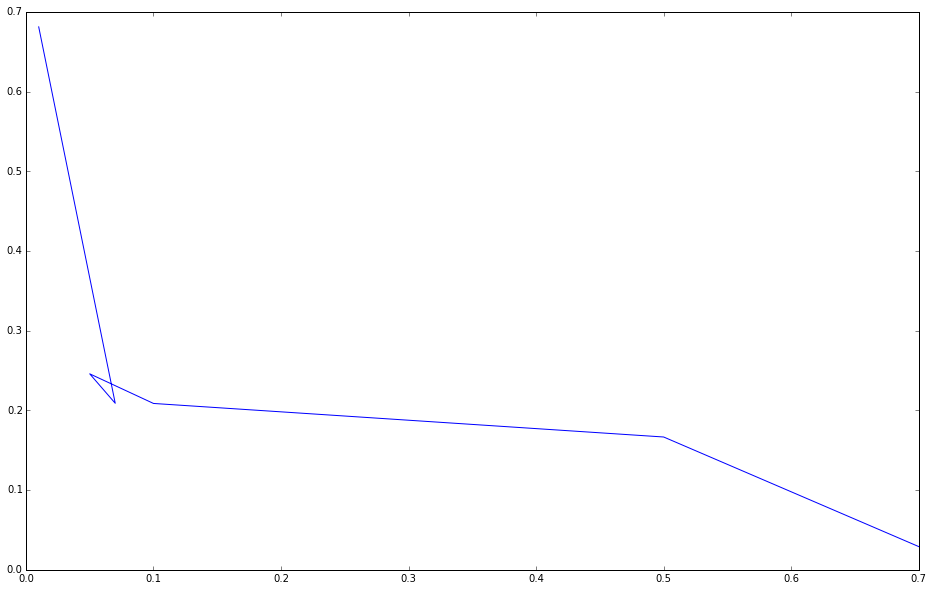

In [42]:
plt.plot(H,h_h)

# Problem 2

In [18]:
import numpy as np
import math
m = [(10,49),(-12,38),(-9,47)]
ee = [(29,19),(32,31),(37,38)]
cs = [(8,9),(30,-28),(-18,-19),(-21,12)]
t = m+ee+cs
x = np.array([i[0] for i in t])
y = np.array([i[1] for i in t])

xm = np.mean(x)
ym = np.mean(y)
xsd = np.std(x, ddof=1)
ysd = np.std(y, ddof=1)
def normalise(d):
    return (round((d[0]-xm)/xsd,4), round((d[1]-ym)/ysd,4))
data = (9,18)
data_normal = normalise(data)

normalised_t = [normalise(d) for d in t]
for i in normalised_t:
    print '{} & {}'.format(i[0], i[1])
print xm, xsd
print ym, ysd

def distance_calculator(data):
    for d in normalised_t:
        l1 = round(abs(d[0]-data[0])+abs(d[1]-data[1]),4)
        l2 = round(math.sqrt(abs(d[0]-data[0])**2+abs(d[1]-data[1])**2),4)
        print ' & {} & {}'.format(l1,l2)
distance_calculator(data_normal)

0.0623 & 1.107
-0.9163 & 0.6928
-0.7829 & 1.0317
0.9074 & -0.0226
1.0409 & 0.4292
1.2633 & 0.6928
-0.0267 & -0.3991
0.9519 & -1.7922
-1.1832 & -1.4534
-1.3167 & -0.2862
8.6 22.4806089281
19.6 26.5589491091
 & 1.2117 & 1.168
 & 1.6871 & 1.1998
 & 1.8926 & 1.354
 & 0.9272 & 0.8904
 & 1.5125 & 1.1341
 & 1.9985 & 1.4554
 & 0.3834 & 0.3418
 & 2.6661 & 1.9678
 & 2.5942 & 1.8394
 & 1.5605 & 1.3535


In [2]:
m+ee+cs

[(10, 49),
 (-12, 38),
 (-9, 47),
 (29, 19),
 (32, 31),
 (37, 38),
 (8, 9),
 (30, -28),
 (-18, -19),
 (-21, 12)]

In [9]:
print data_normal


(0.018755587213161101, -0.063502063974648845)


# Problem 3

In [27]:

p_rain = (9+5+6+3+7+2+3+1)/80.0
p_norain = 1-p_rain

p_temp_hot = 4/8.0
p_temp_cold = 1-p_temp_hot

p_humidity_high = 4/8.0
p_humidity_low = 1-p_humidity_high

p_sky_clear = 4/8.0
p_sky_cloudy = 1-p_sky_clear




HY = -(p_rain*math.log(p_rain,2)+p_norain*math.log(p_norain,2))

##temperature
p_rain_hot = (9+5+6+3)/40.0
p_norain_hot = 1-p_rain_hot

p_rain_cold = (7+2+3+1)/40.0
p_norain_cold = 1-p_rain_cold

h_y_temp = p_temp_hot * -(p_rain_hot*math.log(p_rain_hot,2)+p_norain_hot*math.log(p_norain_hot,2)) + p_temp_cold *-(p_rain_cold*math.log(p_rain_cold,2)+p_norain_cold*math.log(p_norain_cold,2))
g_temp = HY-h_y_temp
##humiditiy

p_rain_high = (9+5+7+2)/40.0
p_norain_high = 1-p_rain_high

p_rain_low = (6+3+3+1)/40.0
p_norain_low = 1-p_rain_low

h_y_humidity = p_humidity_high * -(p_rain_high*math.log(p_rain_high,2)+p_norain_high*math.log(p_norain_high,2))\
                + p_humidity_low *-(p_rain_low*math.log(p_rain_low,2)+p_norain_low*math.log(p_norain_low,2))
g_humidity = HY-h_y_humidity
    
##sky

p_rain_cloudy = (9+6+7+3)/40.0
p_norain_cloudy = 1-p_rain_cloudy

p_rain_clear = (5+3+2+1)/40.0
p_norain_clear = 1-p_rain_clear


h_y_sky = p_sky_cloudy * -(p_rain_cloudy*math.log(p_rain_cloudy,2)+p_norain_cloudy*math.log(p_norain_cloudy,2))\
                + p_sky_clear *-(p_rain_clear*math.log(p_rain_clear,2)+p_norain_clear*math.log(p_norain_clear,2))

g_sky = HY-h_y_sky

In [28]:
print 'Gain for Temperature: {}\tHumidity:{}\tSky:{}'.format(g_temp, g_humidity, g_sky)

Gain for Temperature: 0.0460522614106	Humidity:0.0460522614106	Sky:0.091283363378


### So the root is on Sky!

In [35]:
#H[Y|Temperature,Cloudy]
p_rain_cloudy_hot = (9+6)/20.0
p_norain_cloudy_hot = 1-p_rain_cloudy_hot

p_rain_cloudy_cold = (7+3)/20.0
p_norain_cloudy_cold = 1-p_rain_cloudy_cold

p_cloudy_hot = 2/4.0
p_cloudy_cold = 2/4.0


h_cloudy_temp = p_cloudy_hot * -(p_rain_cloudy_hot*math.log(p_rain_cloudy_hot,2)+p_norain_cloudy_hot*math.log(p_norain_cloudy_hot,2))\
                +p_cloudy_cold * -(p_rain_cloudy_cold*math.log(p_rain_cloudy_cold,2)+p_norain_cloudy_cold*math.log(p_norain_cloudy_cold,2))
g_cloudy_temp = HY-h_cloudy_temp

In [36]:
#H[Y|Temperature,Cloudy]
p_rain_cloudy_high = (9+7)/20.0
p_norain_cloudy_high = 1-p_rain_cloudy_high

p_rain_cloudy_low = (6+3)/20.0
p_norain_cloudy_low = 1-p_rain_cloudy_low

p_cloudy_high = 2/4.0
p_cloudy_low = 1-p_cloudy_high


h_cloudy_hum = p_cloudy_high * -(p_rain_cloudy_high*math.log(p_rain_cloudy_high,2)+p_norain_cloudy_high*math.log(p_norain_cloudy_high,2))\
                +p_cloudy_low * -(p_rain_cloudy_low*math.log(p_rain_cloudy_low,2)+p_norain_cloudy_low*math.log(p_norain_cloudy_low,2))\

g_cloudy_hum = HY-h_cloudy_hum

In [37]:
print 'For Cloudhy Sky: Temperature: {}\t HUmidity:{}'.format(g_cloudy_temp, g_cloudy_hum)

For Cloudhy Sky: Temperature: 0.0871353917582	 HUmidity:0.13542317955


## For cloudy sky, we choose humdity as the next node

## For clear sky, we choose temperature

In [38]:
##For clear sky, temperature =hot
p_rain_clear_hot = (5+3)/20.0
p_norain_clear_hot = 1-p_rain_clear_hot

p_rain_clear_cold = (2+1)/20.0
p_norain_clear_cold = 1-p_rain_clear_cold

# So for Clear, hot => It rains

#p_rain_clear_cold 
#h_clear_cold = p_rain_clear_cold*()


In [42]:
%pylab inline
from __future__ import division
pylab.rcParams['figure.figsize'] = (16, 10)
import scipy.io as sio
import numpy as np
import math
import matplotlib.pyplot as plt
data = sio.loadmat('../data/programming/hw1boundary.mat')
print(data)

Populating the interactive namespace from numpy and matplotlib
{'labels': array([[ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [-1],
   

In [ ]:
#